In [1]:
# Import Libraries for use
import pickle
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import os 
import glob
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Read in the CSV that contains the model results
df = pd.read_csv('model_results.csv')

In [5]:
df_index = df[(df['Modeler'] == 'Courtney') & (df['Model Name'] == 'Decision Tree')].index
df.drop(df_index, inplace=True)

In [6]:
df.head(15)

,Modeler,Model Name,Dependent Variable,Accuracy (%),Precision (%),Recall (%),F1-Support
0,Courtney,Logistic Regression,LOW-G,0.9398,0.0994,0.9977,0.1807
1,Courtney,Logistic Regression,Dynamic Rollover,0.8009,0.0447,0.9421,0.0854
2,Brett,K-Nearest Neighbor (k=2),Dynamic Rollover,1.0000,0.7300,1.0000,0.8500
3,Brett,K-Nearest Neighbor (k=2),LOW-G,1.0000,0.6000,1.0000,0.7500
6,Chris,Random Forest,Dynamic Rollover,1.0000,0.9990,0.9971,0.9980
7,Chris,Random Forest,LOW-G,1.0000,1.0000,0.9985,0.9983
8,Jane,SVM,Dynamic Rollover,0.9900,0.9900,1.0000,0.9900
9,Jane,SVM,LOW-G,0.9900,0.9900,1.0000,0.9900
10,Micaela,Decision Tree,Dynamic Rollover,0.9999,0.9984,0.9968,0.9976
11,Micaela,Decision Tree,LOW-G,0.9999,0.9975,0.9975,0.9975


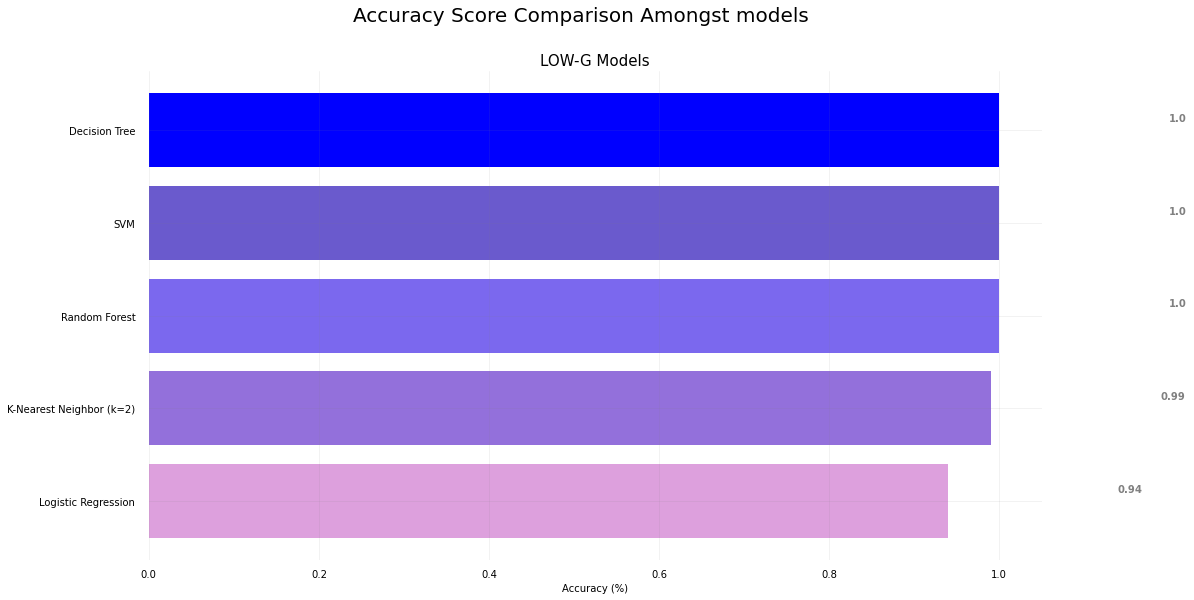

In [7]:
# First step we will look at only accuracy by model type for LOW-G
#Gather the x and y variable
model_type = df[df['Dependent Variable'] == 'LOW-G']['Model Name']
model_acc = df[df['Dependent Variable'] == 'LOW-G'].sort_values(by=['Accuracy (%)'])['Accuracy (%)']

#Create a figure size to be plotted on
fig, ax = plt.subplots(figsize = (16, 9))

#Create a horizontal barplot
ax.barh(model_type, model_acc, color = ['plum','mediumpurple', 'mediumslateblue', 
                                        'slateblue', 'blue'])

#Remove the axis splines
for spline in ['top', 'bottom', 'left', 'right']:
    ax.spines[spline].set_visible(False)
    
#Remove x and y ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

#Add some padding to the axis
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

#Add some gridlines
ax.grid(b = True, color = 'grey',
       linestyle = '-', linewidth = 0.5,
       alpha = 0.2)

#Add an values to bars
for x in ax.patches:
    plt.text(x.get_width() + 0.2, x.get_y() + 0.5,
            str(round((x.get_width()), 2)),
            fontsize = 10, fontweight = 'bold',
            color = 'grey')

#Add plot title
ax.set_title('LOW-G Models', loc = 'center')
#Add subtitle
fig.suptitle('Accuracy Score Comparison Amongst models', fontsize = 20)
ax.set_xlabel('Accuracy (%)')
#Adjust fontsize's
ax.title.set_fontsize(15)

plt.show()

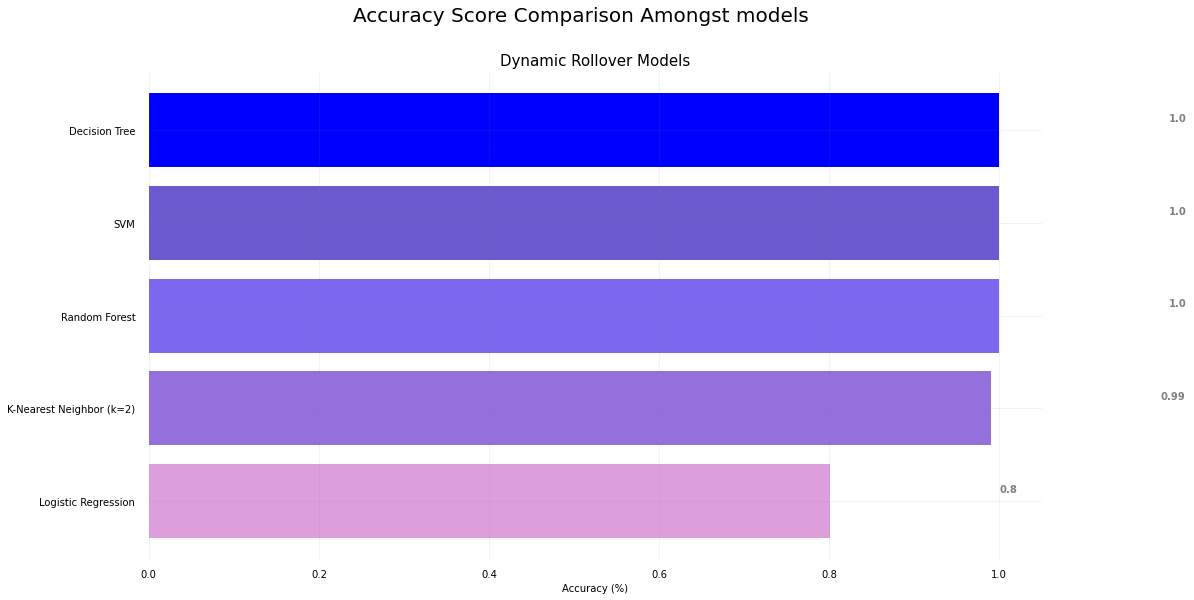

In [8]:
# Next we will look at only accuracy by model type for Dynamic Rollover
#Gather the x and y variable
model_type_DR = df[df['Dependent Variable'] == 'Dynamic Rollover']['Model Name']
model_acc_DR = df[df['Dependent Variable'] == 'Dynamic Rollover'].sort_values(by=['Accuracy (%)'])['Accuracy (%)']

#Create a figure size to be plotted on
fig, ax = plt.subplots(figsize = (16, 9))

#Create a horizontal barplot
ax.barh(model_type_DR, model_acc_DR, color = ['plum','mediumpurple', 'mediumslateblue', 
                                        'slateblue', 'blue'])

#Remove the axis splines
for spline in ['top', 'bottom', 'left', 'right']:
    ax.spines[spline].set_visible(False)
    
#Remove x and y ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

#Add some padding to the axis
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

#Add some gridlines
ax.grid(b = True, color = 'grey',
       linestyle = '-', linewidth = 0.5,
       alpha = 0.2)

#Add an values to bars
for x in ax.patches:
    plt.text(x.get_width() + 0.2, x.get_y() + 0.5,
            str(round((x.get_width()), 2)),
            fontsize = 10, fontweight = 'bold',
            color = 'grey')

#Add plot title
ax.set_title('Dynamic Rollover Models', loc = 'center')
#Add subtitle
fig.suptitle('Accuracy Score Comparison Amongst models', fontsize = 20)
ax.set_xlabel('Accuracy (%)')
#Adjust fontsize's
ax.title.set_fontsize(15)

plt.show()

In [9]:
df[df['Dependent Variable'] == 'LOW-G']['Model Name']

0          Logistic Regression
3     K-Nearest Neighbor (k=2)
7                Random Forest
9                          SVM
11               Decision Tree
Name: Model Name, dtype: object

In [10]:
# LOW-G
#First create a dataframe that has LOW-G Metrics

plotm_scores_LG = pd.DataFrame({
    'Precision' : (df[df['Dependent Variable'] == 'LOW-G'].sort_values(by=['Precision (%)'])['Precision (%)']),
    'Recall' : df[df['Dependent Variable'] == 'LOW-G'].sort_values(by=['Recall (%)'])['Recall (%)'],
    'F1-Score' : df[df['Dependent Variable'] == 'LOW-G'].sort_values(by=['F1-Support'])['F1-Support'],
    'Model Type' : df[df['Dependent Variable'] == 'LOW-G']['Model Name']})

plotm_scores_LG.set_index('Model Type', drop=True, inplace=True)

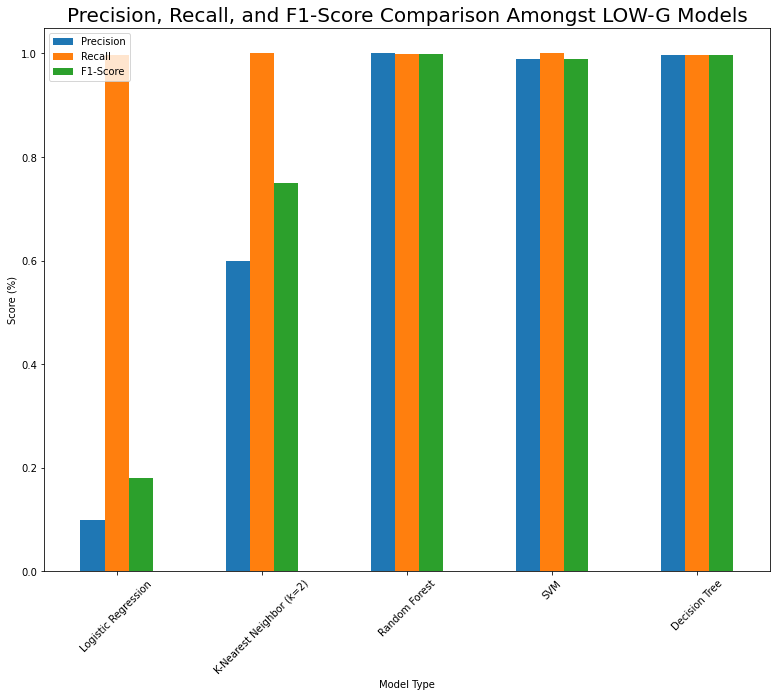

In [11]:
# Plot the LOW-G comparisons

plotm_scores_LG.plot(kind='bar', figsize=(13,10))
plt.xticks(rotation = 45)
plt.ylabel('Score (%)')
plt.title('Precision, Recall, and F1-Score Comparison Amongst LOW-G Models', fontsize = 20)
 
ax.set_xlabel('Accuracy (%)')
plt.show()

In [12]:
# Create the mutli bar plot for Dynamic Rollover models

# First create the dataframe
plotm_scores_DR = pd.DataFrame({
    'Precision' : (df[df['Dependent Variable'] == 'Dynamic Rollover'].sort_values(by=['Precision (%)'])['Precision (%)']),
    'Recall' : df[df['Dependent Variable'] == 'Dynamic Rollover'].sort_values(by=['Recall (%)'])['Recall (%)'],
    'F1-Score' : df[df['Dependent Variable'] == 'Dynamic Rollover'].sort_values(by=['F1-Support'])['F1-Support'],
    'Model Type' : df[df['Dependent Variable'] == 'Dynamic Rollover']['Model Name']})

plotm_scores_DR.set_index('Model Type', drop=True, inplace=True)

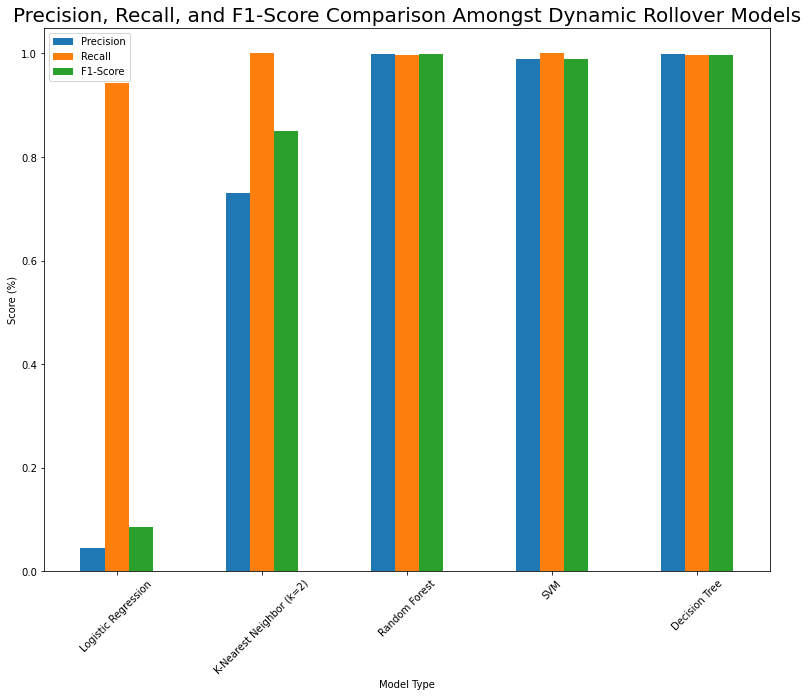

In [13]:
# Plot the Dynamic Rollover comparisons

plotm_scores_DR.plot(kind='bar', figsize=(13,10))
plt.xticks(rotation = 45)
plt.ylabel('Score (%)')
plt.title('Precision, Recall, and F1-Score Comparison Amongst Dynamic Rollover Models', fontsize = 20)
 
ax.set_xlabel('Accuracy (%)')
plt.show()